In [744]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import math
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [745]:
application_df= pd.read_csv('data/application_record.csv') 
application_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [746]:
credit_df= pd.read_csv('data/credit_record.csv')
credit_df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [747]:
merge_df = application_df.merge(credit_df,on='ID')
merge_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [748]:
#keep customers with 12 months credit history
merge_df=  merge_df.groupby('ID').filter(lambda x : len(x)>11)
merge_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [653]:
#merge_df = credit_df.merge(application_df,on='ID')
#merge_df

In [654]:
#merge_df = merge_df[merge_df.MONTHS_BALANCE < -11]
#merge_df 

In [749]:
merge_df.CNT_FAM_MEMBERS.value_counts()

2.0     383953
1.0     125721
3.0     121297
4.0      60507
5.0       8276
6.0       1085
7.0        230
15.0       103
9.0         46
Name: CNT_FAM_MEMBERS, dtype: int64

In [750]:
merge_df = merge_df[merge_df.CNT_FAM_MEMBERS != 9.0] 


In [751]:
merge_df = merge_df[merge_df.CNT_FAM_MEMBERS != 15.0]

In [752]:
# Customers with status X did not get a loan for that month
merge_df.drop(merge_df.loc[merge_df['STATUS']=="X"].index, inplace=True)

In [753]:
merge_df.STATUS.value_counts()

C    320859
0    241688
1      7450
5      1494
2       724
3       269
4       202
Name: STATUS, dtype: int64

In [754]:
merge_df.OCCUPATION_TYPE.value_counts()

Laborers                 96653
Core staff               56424
Sales staff              51575
Managers                 49957
Drivers                  34308
High skill tech staff    23461
Medicine staff           20355
Accountants              20288
Cooking staff             9460
Security staff            9402
Cleaning staff            8379
Private service staff     4720
Low-skill Laborers        2835
Secretaries               2284
Waiters/barmen staff      1868
HR staff                  1342
IT staff                  1096
Realty agents              870
Name: OCCUPATION_TYPE, dtype: int64

In [755]:
merge_df['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

In [757]:
merge_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [758]:
def EDUCATION_TYPE(x):
    if x in ['Secondary / secondary special','Incomplete higher']:
        return 'High school degree'
    else:
        return x

In [759]:
merge_df['NAME_EDUCATION_TYPE'] = list(map(EDUCATION_TYPE, merge_df['NAME_EDUCATION_TYPE']))

In [760]:
merge_df.NAME_EDUCATION_TYPE.value_counts()

High school degree    409633
Higher education      155799
Lower secondary         6587
Academic degree          667
Name: NAME_EDUCATION_TYPE, dtype: int64

In [761]:
# 0: Good payment behaviour, 1: Bad behaviour
def clean_status(x):
    if x in ["0","C"]:
        return "0"
    else:
        return '1'

In [762]:
merge_df['STATUS'] = list(map(clean_status, merge_df['STATUS']))

In [763]:
merge_df.STATUS.value_counts()

0    562547
1     10139
Name: STATUS, dtype: int64

In [764]:
merge_df["DAYS_BIRTH"] = merge_df["DAYS_BIRTH"] / 365 
merge_df


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.890411,-4542,1,1,0,0,Other,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.890411,-4542,1,1,0,0,Other,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.890411,-4542,1,1,0,0,Other,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.890411,-4542,1,1,0,0,Other,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.890411,-4542,1,1,0,0,Other,2.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,High school degree,Single / not married,Rented apartment,-25.172603,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,High school degree,Single / not married,Rented apartment,-25.172603,-1193,1,0,0,0,Laborers,1.0,-10,1
777712,5150337,M,N,Y,0,112500.0,Working,High school degree,Single / not married,Rented apartment,-25.172603,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,High school degree,Single / not married,Rented apartment,-25.172603,-1193,1,0,0,0,Laborers,1.0,-12,0


In [765]:
merge_df["DAYS_BIRTH"] = merge_df["DAYS_BIRTH"].abs()
merge_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-4542,1,1,0,0,Other,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-4542,1,1,0,0,Other,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-4542,1,1,0,0,Other,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-4542,1,1,0,0,Other,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-4542,1,1,0,0,Other,2.0,-4,0


In [766]:
merge_df["DAYS_BIRTH"] = round(merge_df["DAYS_BIRTH"]).astype(int)
merge_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,-4542,1,1,0,0,Other,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,-4542,1,1,0,0,Other,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,-4542,1,1,0,0,Other,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,-4542,1,1,0,0,Other,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,-4542,1,1,0,0,Other,2.0,-4,0


In [767]:
merge_df["DAYS_EMPLOYED"] = merge_df["DAYS_EMPLOYED"] / 365 
merge_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,-12.443836,1,1,0,0,Other,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,-12.443836,1,1,0,0,Other,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,-12.443836,1,1,0,0,Other,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,-12.443836,1,1,0,0,Other,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,-12.443836,1,1,0,0,Other,2.0,-4,0


In [768]:
merge_df["DAYS_EMPLOYED"] = merge_df["DAYS_EMPLOYED"].abs()
merge_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12.443836,1,1,0,0,Other,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12.443836,1,1,0,0,Other,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12.443836,1,1,0,0,Other,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12.443836,1,1,0,0,Other,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12.443836,1,1,0,0,Other,2.0,-4,0


In [769]:
merge_df["DAYS_EMPLOYED"] = round(merge_df["DAYS_EMPLOYED"]).astype(int)
merge_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2.0,-4,0


In [770]:
merge_df["CNT_FAM_MEMBERS"] = merge_df["CNT_FAM_MEMBERS"].astype(int)
merge_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2,-4,0


In [771]:
merge_df["MONTHS_BALANCE"] = merge_df["MONTHS_BALANCE"].abs()
merge_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2,1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2,2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2,3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2,4,0


In [772]:
merge_num_df = merge_df._get_numeric_data()
merge_num_df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
0,5008804,0,427500.0,33,12,1,1,0,0,2,0
1,5008804,0,427500.0,33,12,1,1,0,0,2,1
2,5008804,0,427500.0,33,12,1,1,0,0,2,2
3,5008804,0,427500.0,33,12,1,1,0,0,2,3
4,5008804,0,427500.0,33,12,1,1,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,25,3,1,0,0,0,1,9
777711,5150337,0,112500.0,25,3,1,0,0,0,1,10
777712,5150337,0,112500.0,25,3,1,0,0,0,1,11
777713,5150337,0,112500.0,25,3,1,0,0,0,1,12


In [773]:
merge_cat_df = merge_df.select_dtypes(exclude=[np.number])
merge_cat_df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,STATUS
0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,Other,0
1,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,Other,0
2,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,Other,0
3,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,Other,0
4,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,Other,0
...,...,...,...,...,...,...,...,...,...
777710,M,N,Y,Working,High school degree,Single / not married,Rented apartment,Laborers,0
777711,M,N,Y,Working,High school degree,Single / not married,Rented apartment,Laborers,1
777712,M,N,Y,Working,High school degree,Single / not married,Rented apartment,Laborers,1
777713,M,N,Y,Working,High school degree,Single / not married,Rented apartment,Laborers,0


<AxesSubplot:>

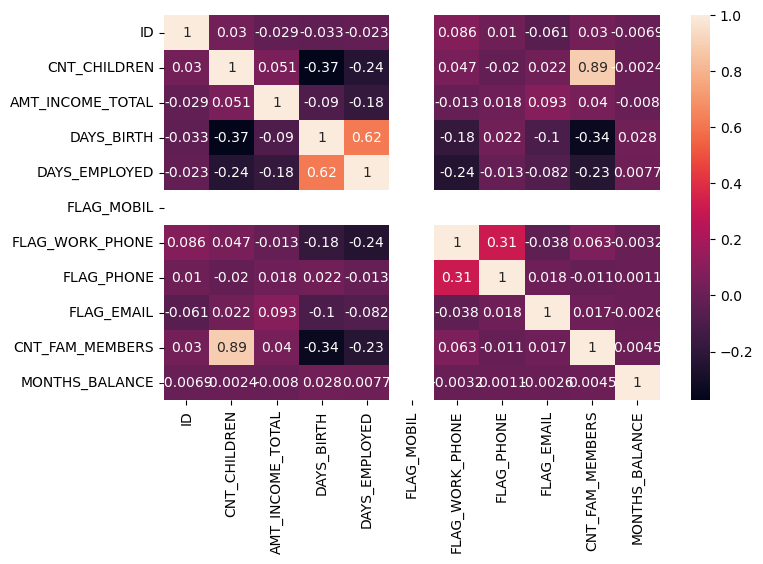

In [774]:
fig_Heatmap = plt.figure(figsize=(8,5))
sns.heatmap(merge_num_df.corr(),annot=True)

In [775]:
merge_num_df = merge_num_df.drop(columns=['MONTHS_BALANCE', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',])
merge_num_df

,ID,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,427500.0,33,12,2
1,5008804,427500.0,33,12,2
2,5008804,427500.0,33,12,2
3,5008804,427500.0,33,12,2
4,5008804,427500.0,33,12,2
...,...,...,...,...,...
777710,5150337,112500.0,25,3,1
777711,5150337,112500.0,25,3,1
777712,5150337,112500.0,25,3,1
777713,5150337,112500.0,25,3,1


In [776]:
merge_cat_df.CODE_GENDER.unique()

array(['M', 'F'], dtype=object)

In [777]:
merge_cat_df.FLAG_OWN_CAR.unique()

array(['Y', 'N'], dtype=object)

In [778]:
merge_cat_df.FLAG_OWN_REALTY.unique()

array(['Y', 'N'], dtype=object)

In [779]:
merge_cat_df.NAME_INCOME_TYPE.unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [780]:
merge_cat_df.NAME_EDUCATION_TYPE.unique()

array(['Higher education', 'High school degree', 'Lower secondary',
       'Academic degree'], dtype=object)

In [781]:
merge_cat_df.NAME_FAMILY_STATUS.unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [782]:
merge_cat_df.NAME_HOUSING_TYPE.unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [783]:
merge_cat_df.OCCUPATION_TYPE.unique()

array(['Other', 'Security staff', 'Sales staff', 'Accountants',
       'Laborers', 'Managers', 'Drivers', 'Core staff',
       'High skill tech staff', 'Cleaning staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Private service staff',
       'Secretaries', 'Waiters/barmen staff', 'HR staff', 'IT staff',
       'Realty agents'], dtype=object)

In [691]:
#merge_cat_df = pd.get_dummies(merge_cat_df, columns=["CODE_GENDER", "FLAG_OWN_CAR", 'FLAG_OWN_REALTY', "NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE"], prefix= "dmy")

In [784]:
merge_cat_df.head(4)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,STATUS
0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,Other,0
1,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,Other,0
2,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,Other,0
3,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,Other,0


In [785]:
merge_df.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2,1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,Other,2,2,0


In [786]:
merge_df = merge_df.drop(columns=['MONTHS_BALANCE', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',])
merge_df.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,Other,2,0
1,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,Other,2,0
2,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,Other,2,0


In [787]:
merge_df= merge_df.drop_duplicates()

In [788]:
merge_df.reset_index(inplace=True, drop=True)

In [789]:
merge_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,Other,2,0
1,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,Other,2,1
2,5008805,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,Other,2,0
3,5008805,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,Other,2,1
4,5008806,M,Y,Y,112500.0,Working,High school degree,Married,House / apartment,59,3,Security staff,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25864,5149834,F,N,Y,157500.0,Commercial associate,Higher education,Married,House / apartment,34,4,Medicine staff,2,1
25865,5149838,F,N,Y,157500.0,Pensioner,Higher education,Married,House / apartment,34,4,Medicine staff,2,0
25866,5149838,F,N,Y,157500.0,Pensioner,Higher education,Married,House / apartment,34,4,Medicine staff,2,1
25867,5150337,M,N,Y,112500.0,Working,High school degree,Single / not married,Rented apartment,25,3,Laborers,1,0


In [790]:
#merge_df.loc[merge_df["STATUS"].eq(merge)]

In [791]:
idx = pd.DataFrame(merge_df.groupby("ID")["STATUS"].max())
idx.reset_index(inplace=True)
print(idx)

            ID STATUS
0      5008804      1
1      5008805      1
2      5008806      0
3      5008810      0
4      5008811      0
...        ...    ...
22426  5150478      0
22427  5150480      0
22428  5150482      0
22429  5150484      0
22430  5150487      0

[22431 rows x 2 columns]


In [792]:
new_df = merge_df.merge(idx, left_on=["ID", "STATUS"], right_on=["ID", "STATUS"])

In [793]:
new_df['STATUS'].value_counts()

0    18978
1     3453
Name: STATUS, dtype: int64

In [794]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,Other,2,1
1,5008805,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,Other,2,1
2,5008806,M,Y,Y,112500.0,Working,High school degree,Married,House / apartment,59,3,Security staff,2,0
3,5008810,F,N,Y,270000.0,Commercial associate,High school degree,Single / not married,House / apartment,52,8,Sales staff,1,0
4,5008811,F,N,Y,270000.0,Commercial associate,High school degree,Single / not married,House / apartment,52,8,Sales staff,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22426,5149775,F,Y,Y,130500.0,Working,High school degree,Married,House / apartment,44,26,Laborers,2,1
22427,5149828,M,Y,Y,315000.0,Working,High school degree,Married,House / apartment,48,7,Managers,2,1
22428,5149834,F,N,Y,157500.0,Commercial associate,Higher education,Married,House / apartment,34,4,Medicine staff,2,1
22429,5149838,F,N,Y,157500.0,Pensioner,Higher education,Married,House / apartment,34,4,Medicine staff,2,1


In [795]:
new_df = new_df.drop(columns=['ID'])
new_df.head(3)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,Other,2,1
1,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,Other,2,1
2,M,Y,Y,112500.0,Working,High school degree,Married,House / apartment,59,3,Security staff,2,0


In [796]:
new_df = pd.get_dummies(new_df, columns=["CODE_GENDER", "FLAG_OWN_CAR", 'FLAG_OWN_REALTY', "NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE"], prefix= "dmy", drop_first = True)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,Other,2,0
1,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,Other,2,1
2,5008805,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,Other,2,0


In [797]:
new_df

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS,dmy_M,dmy_Y,dmy_Y,dmy_Pensioner,dmy_State servant,...,dmy_Low-skill Laborers,dmy_Managers,dmy_Medicine staff,dmy_Other,dmy_Private service staff,dmy_Realty agents,dmy_Sales staff,dmy_Secretaries,dmy_Security staff,dmy_Waiters/barmen staff
0,427500.0,33,12,2,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,427500.0,33,12,2,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,112500.0,59,3,2,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,270000.0,52,8,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,270000.0,52,8,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22426,130500.0,44,26,2,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
22427,315000.0,48,7,2,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
22428,157500.0,34,4,2,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
22429,157500.0,34,4,2,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [798]:
 print(new_df. columns)

Index(['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',
       'STATUS', 'dmy_M', 'dmy_Y', 'dmy_Y', 'dmy_Pensioner',
       'dmy_State servant', 'dmy_Student', 'dmy_Working',
       'dmy_High school degree', 'dmy_Higher education', 'dmy_Lower secondary',
       'dmy_Married', 'dmy_Separated', 'dmy_Single / not married', 'dmy_Widow',
       'dmy_House / apartment', 'dmy_Municipal apartment',
       'dmy_Office apartment', 'dmy_Rented apartment', 'dmy_With parents',
       'dmy_Cleaning staff', 'dmy_Cooking staff', 'dmy_Core staff',
       'dmy_Drivers', 'dmy_HR staff', 'dmy_High skill tech staff',
       'dmy_IT staff', 'dmy_Laborers', 'dmy_Low-skill Laborers',
       'dmy_Managers', 'dmy_Medicine staff', 'dmy_Other',
       'dmy_Private service staff', 'dmy_Realty agents', 'dmy_Sales staff',
       'dmy_Secretaries', 'dmy_Security staff', 'dmy_Waiters/barmen staff'],
      dtype='object')


In [530]:
merge_df

,ID,STATUS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,dmy_F,dmy_M,dmy_N,dmy_Y,...,dmy_Low-skill Laborers,dmy_Managers,dmy_Medicine staff,dmy_Other,dmy_Private service staff,dmy_Realty agents,dmy_Sales staff,dmy_Secretaries,dmy_Security staff,dmy_Waiters/barmen staff
12,5008804,0,427500.0,33,12,2,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
13,5008804,1,427500.0,33,12,2,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
14,5008804,0,427500.0,33,12,2,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
28,5008805,1,427500.0,33,12,2,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
29,5008805,0,427500.0,33,12,2,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,0,202500.0,53,6,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
777711,5150487,0,202500.0,53,6,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
777712,5150487,0,202500.0,53,6,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
777713,5150487,0,202500.0,53,6,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [531]:
merge_df.set_index('ID', inplace=True)

In [532]:
merge_df

,STATUS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,dmy_F,dmy_M,dmy_N,dmy_Y,dmy_N,...,dmy_Low-skill Laborers,dmy_Managers,dmy_Medicine staff,dmy_Other,dmy_Private service staff,dmy_Realty agents,dmy_Sales staff,dmy_Secretaries,dmy_Security staff,dmy_Waiters/barmen staff
ID,,,,,,,,,,,,,,,,,,,,,
5008804,0,427500.0,33,12,2,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5008804,1,427500.0,33,12,2,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5008804,0,427500.0,33,12,2,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5008805,1,427500.0,33,12,2,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5008805,0,427500.0,33,12,2,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150487,0,202500.0,53,6,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5150487,0,202500.0,53,6,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5150487,0,202500.0,53,6,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [533]:
filename="dataCC.csv"

In [534]:
merge_df.to_csv(filename, index = True)

In [799]:
filename="dataXX.csv"

In [800]:
new_df.to_csv(filename, index = True)